In [25]:
import sys
import os
import importlib
import pandas as pd

sys.path.append('../shared')

if 'nlp_methods' in sys.modules:
    importlib.reload(sys.modules['nlp_methods'])

from nlp_methods import NLPMethods

## Task 1.2: Text Preprocessing
- Load and combine your text(s) into a single corpus
- Remove Project Gutenberg headers and footers from each text

In [26]:
nlp_methods = NLPMethods("https://www.gutenberg.org/cache/epub/2500/pg2500.txt")

clean_corpus = nlp_methods.remove_gutenberg_header()

## Task 1.3: Regex Pattern Analysis

### Dialogue extraction
- Count total dialogue instances
- Extract the longest piece of dialogue and count its length

### Chapters
- Find all chapter names in each book and store them in a data frame


In [ ]:
# Print count of total dialogue instances
# Extract the longest piece of dialogue and count its length and print it
corpus_data = nlp_methods.get_processed_text(clean_corpus)

print("______________________________________________________________________")

chapters = nlp_methods.get_chapters(clean_corpus)
print(chapters)
chapters_df = pd.DataFrame(chapters, columns=['Chapter'])
chapters_df = chapters_df.set_axis(range(1, len(chapters_df) + 1))
chapters_df

Number of quotes found: 372
Longest dialogue instance (2204 characters):
"Listen well, my dear, listen well! The sinner, which I am and which
you are, is a sinner, but in times to come he will be Brahma again, he
will reach the Nirvana, will be Buddha—and now see: these ‘times to
come’ are a deception, are only a parable! The sinner is not on his way
to become a Buddha, he is not in the process of developing, though our
capacity for thinking does not know how else to picture these things.
No, within the sinner is now and today already the future Buddha, his
future is already all there, you have to worship in him, in you, in
everyone the Buddha which is coming into being, the possible, the
hidden Buddha. The world, my friend Govinda, is not imperfect, or on a
slow path towards perfection: no, it is perfect in every moment, all
sin already carries the divine forgiveness in itself, all small
children already have the old person in themselves, all infants already
have death, all dying peop

,0
1,THE SON OF THE BRAHMAN
2,WITH THE SAMANAS
3,GOTAMA
4,AWAKENING
5,KAMALA
6,WITH THE CHILDLIKE PEOPLE
7,SANSARA
8,BY THE RIVER
9,THE FERRYMAN
10,THE SON


## (Optional, if you want to take it further): Analyze dialogue vs. narrative ratio

/var/folders/02/c1hvrmj11kx0z457p84l6pbc0000gn/T/ipykernel_38210/3749549574.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h',


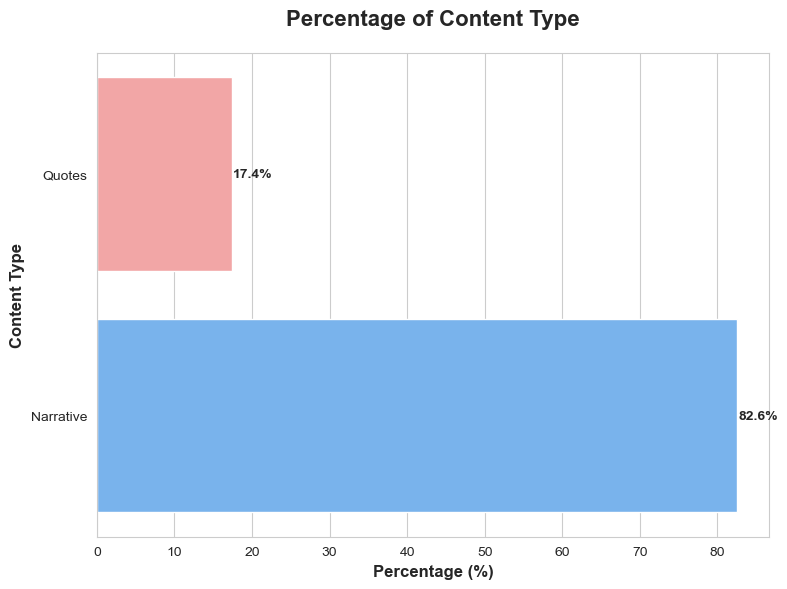


📊 QUOTES VS NARRATIVE ANALYSIS
Total sentences: 2,134
Dialogue Instances: 372 (17.4%)
Narrative sentences: 1,762 (82.6%)

Total tokens: 39,799
Quote tokens: 0
Narrative tokens: 39,799

Ratio of narrative to quotes: 4.7:1


In [28]:
# Plot quotes vs narrative comparison using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract quote vs narrative data from corpus_data
quotes = len(corpus_data['quotes'])
non_quote_sentences = len(corpus_data['non_quote_sentences'])
quote_tokens = len(corpus_data['quote_tokens'])
non_quote_tokens = len(corpus_data['non_quote_tokens'])

# Calculate percentages
quote_percentage = (quotes / (quotes + non_quote_sentences)) * 100
narrative_percentage = (non_quote_sentences / (quotes + non_quote_sentences)) * 100

# Prepare data for seaborn
plot_data = pd.DataFrame({
    'Content_Type': ['Quotes', 'Narrative'],
    'Percentage': [quote_percentage, narrative_percentage]
})

# Create seaborn plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create horizontal bar plot with custom colors
ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h', 
                 palette=['#ff9999', '#66b3ff'])

# Customize the plot
ax.set_title('Percentage of Content Type', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Content Type', fontsize=12, fontweight='bold')

# Add value labels on bars
for i, (bar, pct) in enumerate(zip(ax.patches, [quote_percentage, narrative_percentage])):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print additional insights
print(f"\n📊 QUOTES VS NARRATIVE ANALYSIS")
print(f"=" * 40)
print(f"Total sentences: {quotes + non_quote_sentences:,}")
print(f"Dialogue Instances: {quotes:,} ({quote_percentage:.1f}%)")
print(f"Narrative sentences: {non_quote_sentences:,} ({narrative_percentage:.1f}%)")
print(f"\nTotal tokens: {quote_tokens + non_quote_tokens:,}")
print(f"Quote tokens: {quote_tokens:,}")
print(f"Narrative tokens: {non_quote_tokens:,}")
print(f"\nRatio of narrative to quotes: {non_quote_sentences/quotes:.1f}:1")


## AI assistance 
**Prompt:** Can we change this to a seaborn plot
**Response:** Now I'll convert the matplotlib plot to use seaborn. I can see that seaborn is already imported in cell 1, so I'll update cell 2 to use seaborn's barplot functionality.